# House Price (Addvance Regression Technique)

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. Predicting house prices is useful to identify fruitful investments or to determine whether the price advertised for a house is over or under-estimated.

In [61]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for data transformation (yeo-johnson)
import scipy.stats as stats

import warnings

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

warnings.filterwarnings("ignore")

## Prepare Dataset

### Import 

In [11]:
# load dataset
data = pd.read_csv("train.csv")

In [12]:
# Get dataset info and visualize dataset
print('Shape: ', data.shape)
print(data.info())
data.head()

Shape:  (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   in

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration

**We will analyze the following**:
1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distribution
    - Transformations
5. Categorical variable
    - Cardinality
    -Rare Labels
    - Encoding


In [13]:
ids = data['Id']
data.drop(columns='Id', inplace=True)

**Target Variable**

Exploring the distribution of the target variable

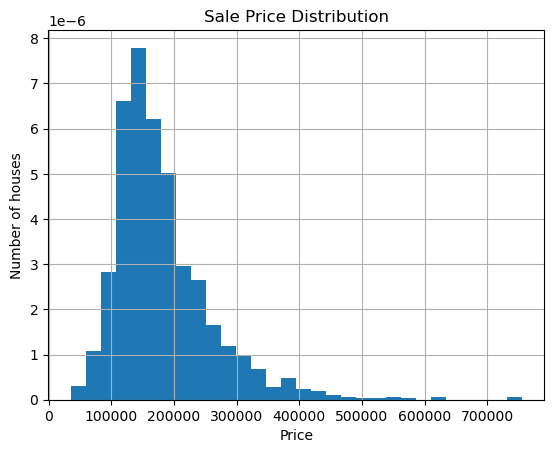

In [14]:
data['SalePrice'].hist(bins=30, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Price')
plt.title('Sale Price Distribution')
plt.show()

We can see that the target is continuous, and the distribution is skewed towards the right.

We can improve the value spread with a mathematical transformation.

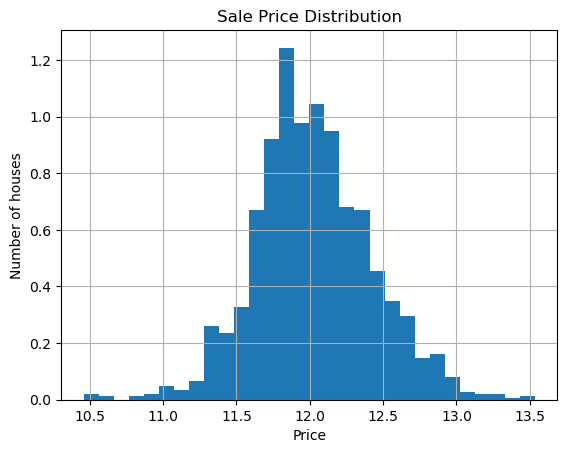

In [15]:
# transforming the target using the logarithmic function
np.log(data['SalePrice']).hist(bins=30, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Price')
plt.title('Sale Price Distribution')
plt.show()

The distribution looks more Gaussian after applying a logarithmic function

**Variable Types**

Next, we are going to identify the categorical and numerical variabels

In [16]:
# identifying the categorical variable
cat_var = list(data.select_dtypes(include='O').columns.values)

# MSSubClass is also categorical column by definition, despite its numeric values
# MSSubClass is going to be added to the list of categorical data columns

cat_var += ["MSSubClass"]

# printing total number of categorical variables
print('Number of cat. variables: ', len(cat_var))

Number of cat. variables:  44


In [17]:
# casting all categorical variable as 'object' type
data[cat_var] = data[cat_var].astype('O')

In [18]:
# identifying numerical variable
num_var  = list(data.drop(columns='SalePrice').select_dtypes(include="number").columns.values)

# printing the total number of numerical variable
print('Number of Num. variable: ', len(num_var))

Number of Num. variable:  35


**Missing Values**:

Finding columns with missing values.

In [22]:
# making a list of the variables that contains missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
# vars_with_na

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
data[vars_with_na].isna().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

Our dataset contains a few variables with a big proportion of missing values (4 variables at the top). And some other variables with a small percentage of missing observations.

This means that to train a machine learning model with this data set, we need to impute the missing data in these variables.

We can also visualize the percentage of missing values in the variables as follows:

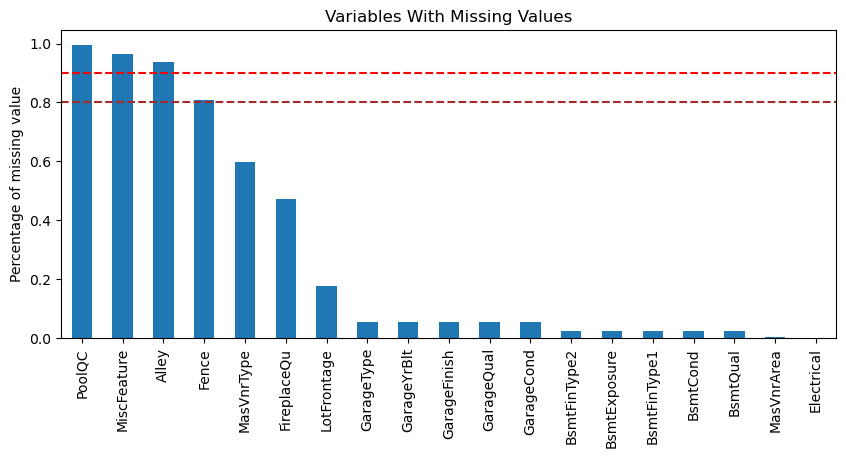

In [27]:
# plot
(
data[vars_with_na].isna()
    .mean()
    .sort_values(ascending=False)
    .plot.bar(figsize=(10,4))
)
plt.ylabel("Percentage of missing value")
plt.title("Variables With Missing Values")
plt.axhline(0.9, color='r', linestyle='--')
plt.axhline(0.8, color='brown', linestyle='--')

In [28]:
# we can determine which variable, from those with missing data,
# are numerical or categorical

cat_na = [var for var in vars_with_na if var in cat_var]
num_na = [var for var in vars_with_na if var in num_var]

print("number of categorical variables with missing values: ", len(cat_na))
print("number of numerical variables with missing values: ", len(num_na))

number of categorical variables with missing values:  16
number of numerical variables with missing values:  3


In [29]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [30]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

**Relationship between missing data and SalePrice**

Evaluating the price of the house in those observations where the information is missing. 

In [33]:
def analyse_na_values(df, var):
    # make a copy of the original dataframe to avoid override
    df = df.copy()
    
    # let's make an interim variable that indicates 1 if the 
    # observation was missin or 0 otherwise
    df[var] = np.where(df[var].isna(), 1, 0)
    
    # compare the median SalePrice in the observations where data
    # is missing vs the observations where data is available 
    
    # determine the median price in the group 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    temp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    
    # plot into a bar graph
    temp.plot(kind="barh", y='mean', legend=False,
            xerr="std", title="Sale Price", color='green')
    
    plt.show()

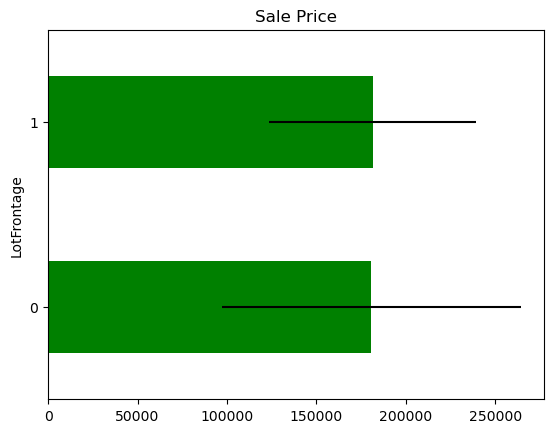

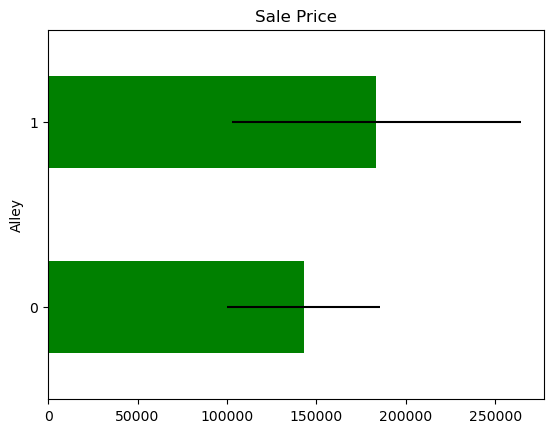

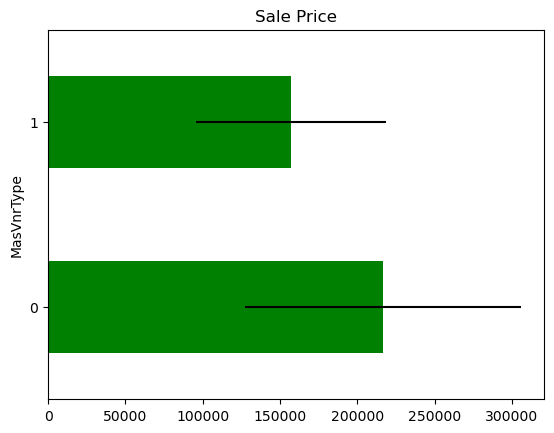

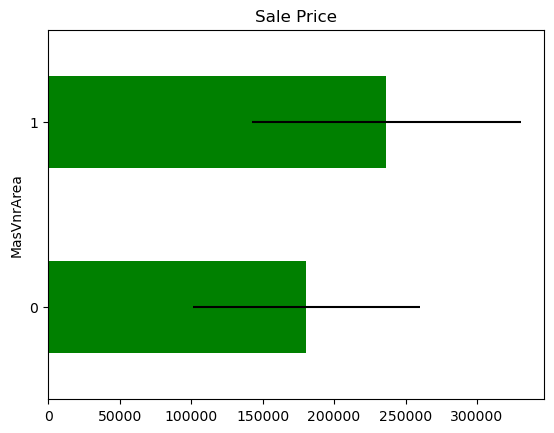

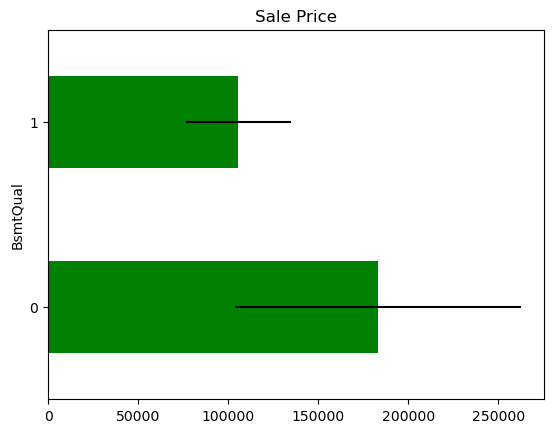

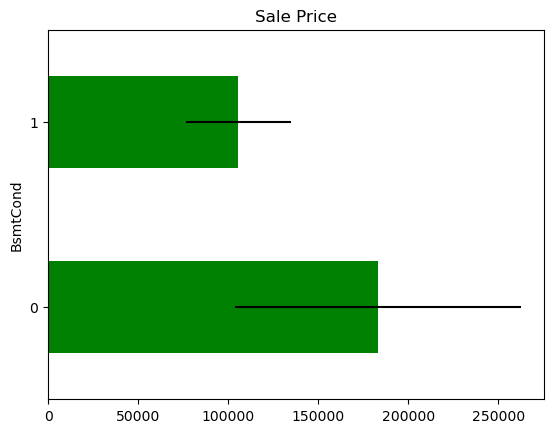

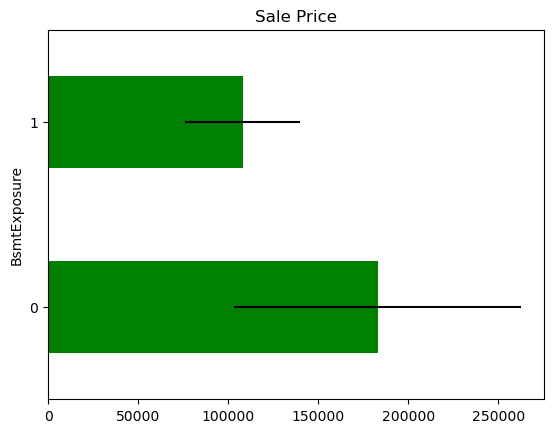

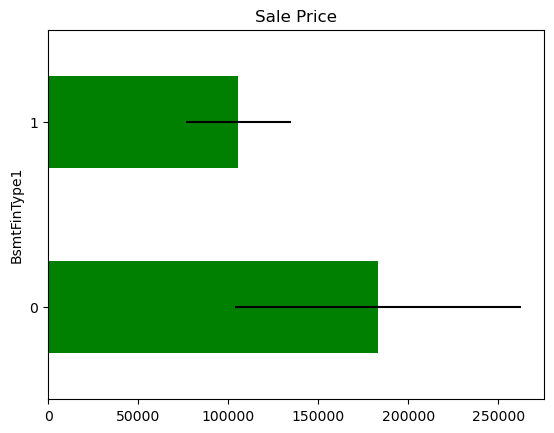

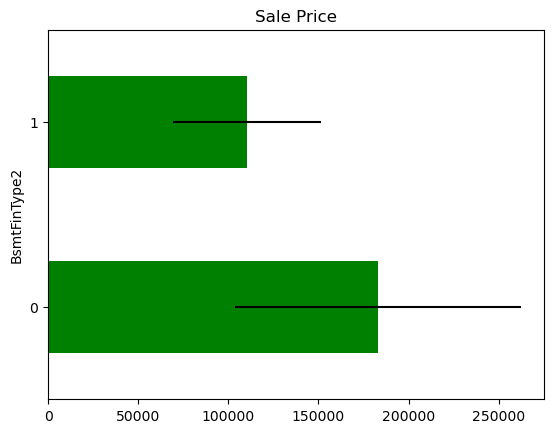

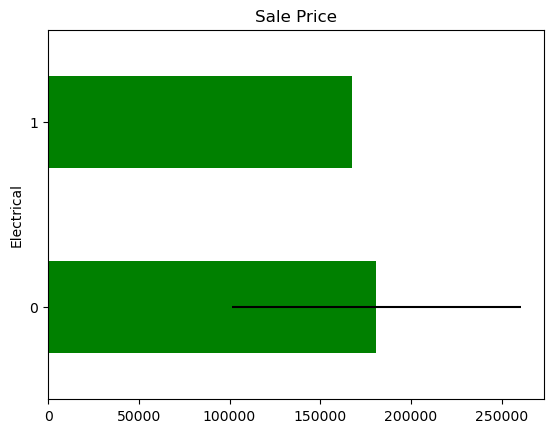

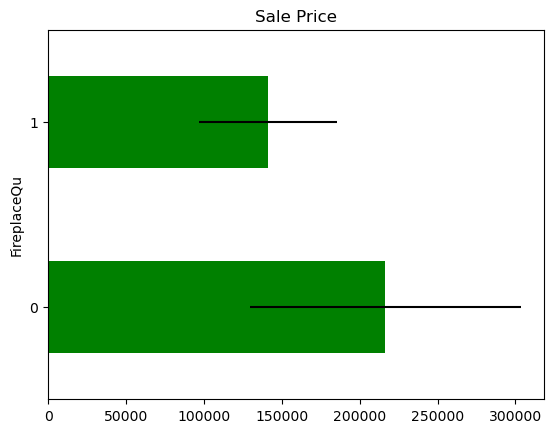

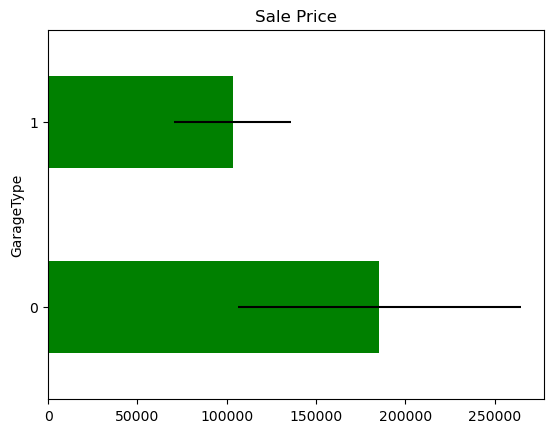

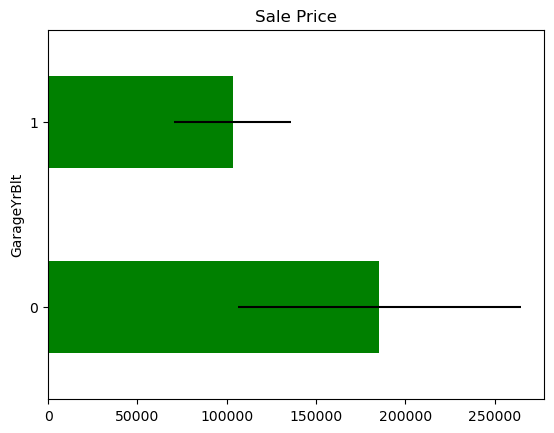

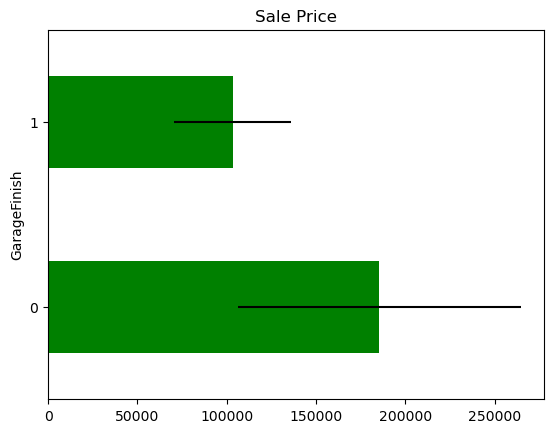

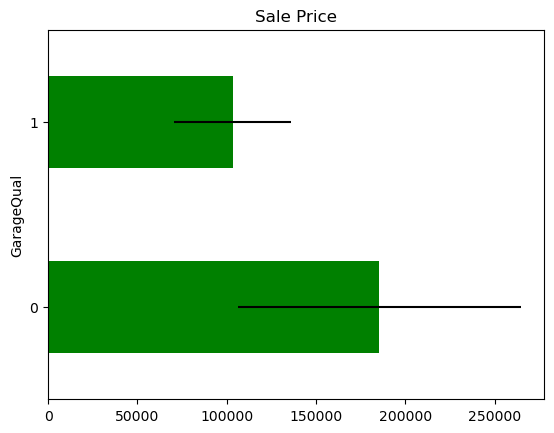

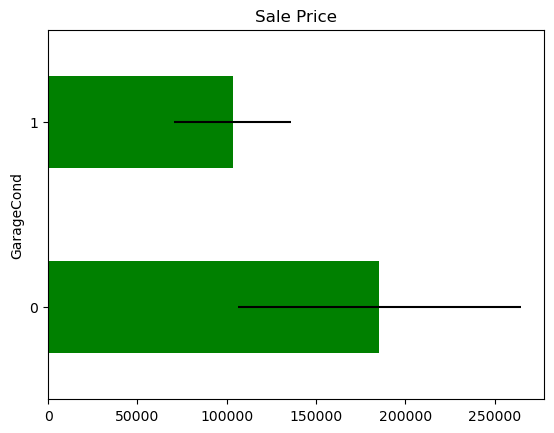

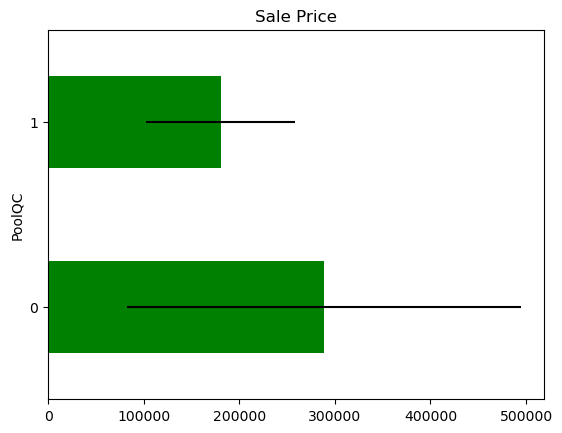

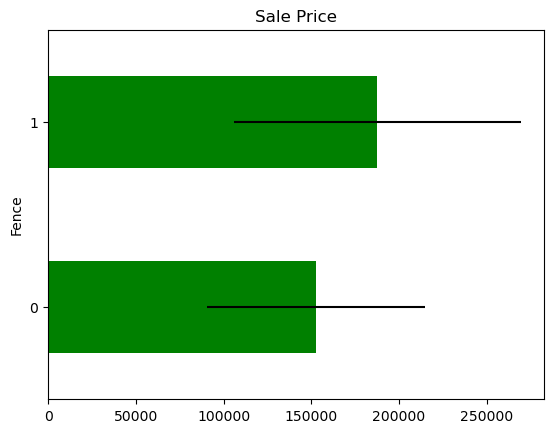

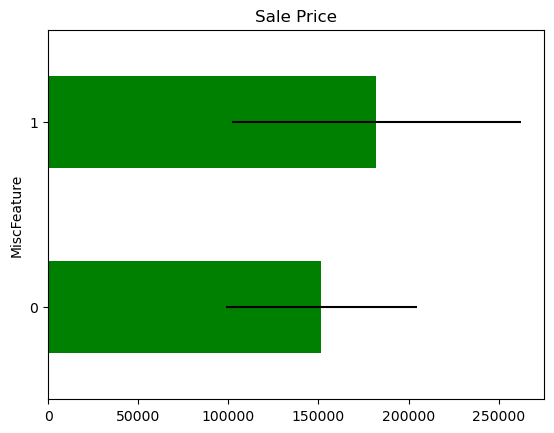

In [34]:
for var in vars_with_na:
    analyse_na_values(data, var)

In some variables, the averages Sale Price in houses where the information is missing, differ from the average Sale Price in houses where information exists. This suggests that data being missing could be a good predictor of Sale Price.

**Numerical Variables**

Finding out what numerical variables we have in the dataset


In [36]:
data[num_var].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


**Temporal Variables**

We have 4 variables that indicate year information in the dataset:
- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold


In [37]:
# lsit of information containing year information
year_vars = [var for var in num_var if "Year" in var or "Yr" in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [43]:
# Exploring the values of the temporal variable
for var in year_vars:
    print(var, np.sort(data[var].unique()))
    print()
    print()

YearBuilt [1872 1875 1880 1882 1885 1890 1892 1893 1898 1900 1904 1905 1906 1908
 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923
 1924 1925 1926 1927 1928 1929 1930 1931 1932 1934 1935 1936 1937 1938
 1939 1940 1941 1942 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]


YearRemodAdd [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]


GarageYrBlt [1900. 1906. 1908. 1910. 1914. 1915. 1916. 1918. 1920. 1921. 1922. 1923.
 1924. 1

As expected, the values are years.

We can explore the evolution of the sale price with the years in which the house was sold

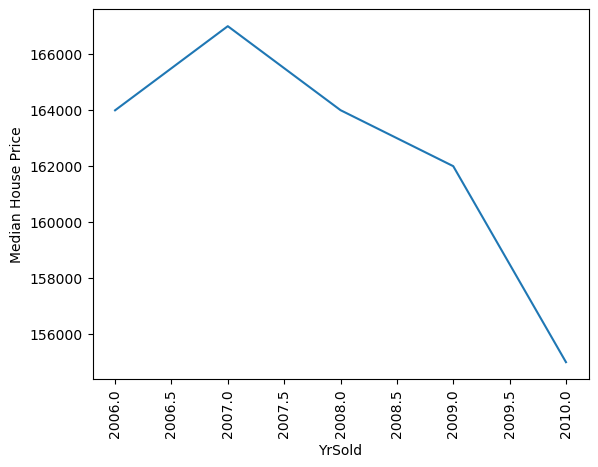

In [45]:
data.groupby(by='YrSold')['SalePrice'].median().plot()
plt.ylabel("Median House Price")
plt.xticks(rotation=90)
plt.show()

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.

We are going to explore a bit further.

Let's plot the price of sale vs year in which it was built.

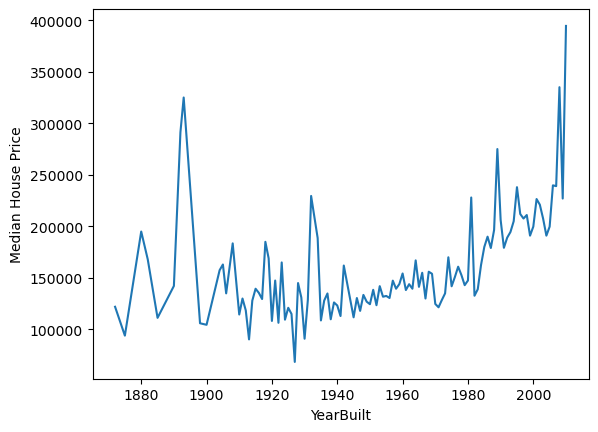

In [47]:
# plot median sale price vs year in which it was built
data.groupby("YearBuilt")['SalePrice'].median().plot()
plt.ylabel("Median House Price")
plt.show()

We can see that newly built / younger houses tend to be more expensive.

It could be that older houses were sold?

Let's take a look by calculating the elapsed year between the Year variables and the year in which the house was sold:

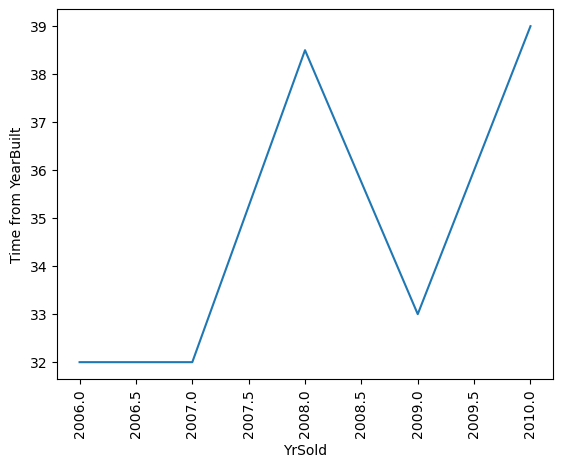

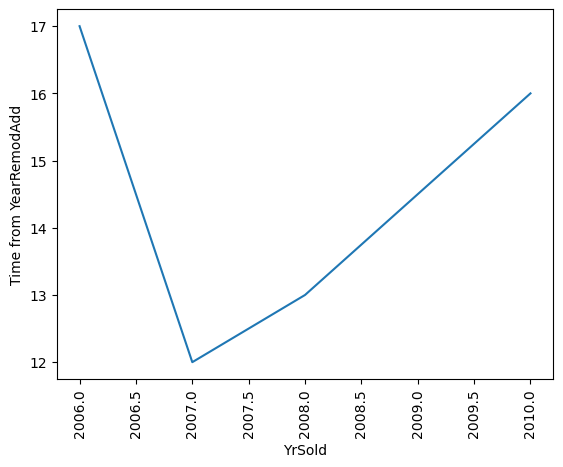

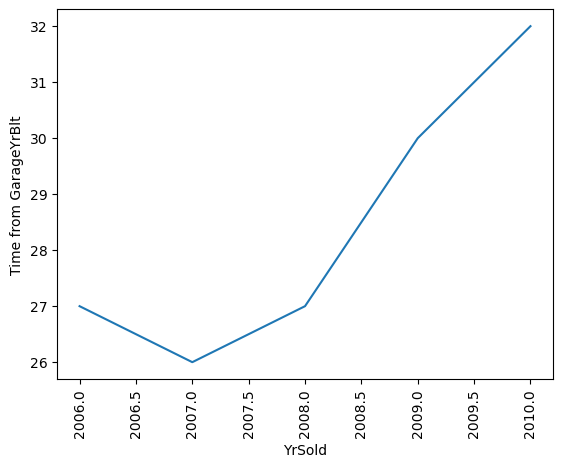

In [51]:
def analyze_year_vars(df, var):
    df = df.copy()
    
    # capture differemce between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel("Time from " + var)
    plt.xticks(rotation=90)
    plt.show()
    
for var in year_vars:
    if var != 'YrSold':
        analyze_year_vars(data, var)

From this plot, we see that towards 2010, the houses sold had older garages, and had not been remodeled recently, This might explain why we see cheaper sales prices in recent years, at least in the dataset.

Checking what the relationship of each extracted time is like with the output variable

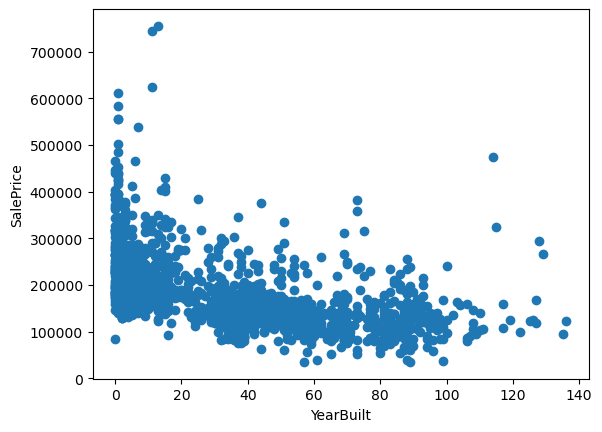

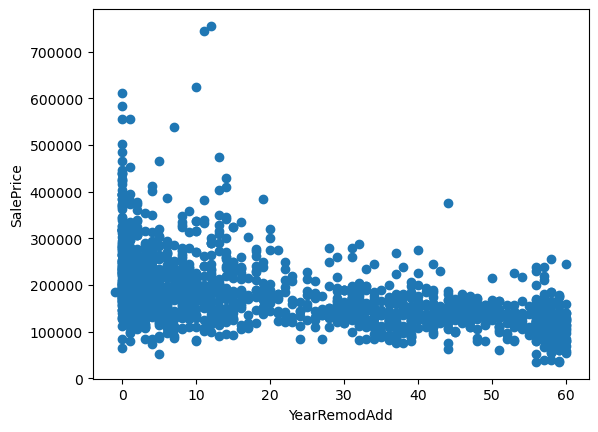

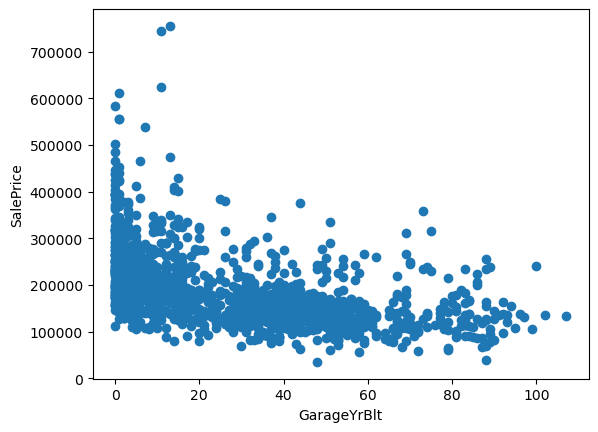

In [54]:
def analyze_year_vars(df, var):
    
    df = df.copy()
    
    # capture difference between a year variable and year
    # in which the house was sold
    df[var] = df["YrSold"] -df[var]
    
    # plotting the relationship using scatter plot
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel("SalePrice")
    plt.xlabel(var)
    plt.show()
    
for var in year_vars:
    if var != "YrSold":
        analyze_year_vars(data, var)

We see That there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price.

This make sense, because this means that the house will have an older look, and potentially needs repairs.

**Discrete Variables**

Finding variables that are discrete, i.e., show a finite number of values


In [55]:
# make a list of discrete variables
discrete_vars = [var for var in num_var if var not in year_vars and 
                data[var].nunique() < 20]

In [57]:
data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


These discrete variable tend to be qualifications (Qual) or grading scales (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the area of the room  (KitchenAbvGr).

We expect higher prices with bigger numbers.

I will go ahead and analyze their contribution to the house price.

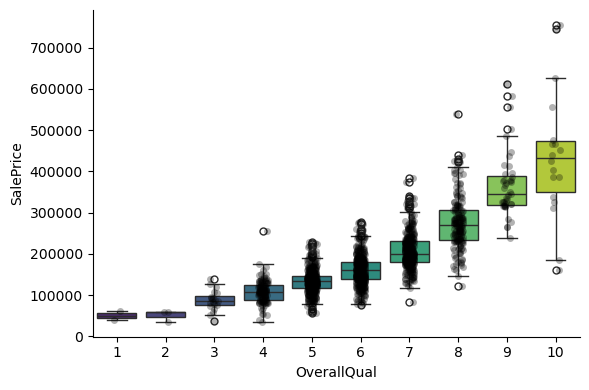

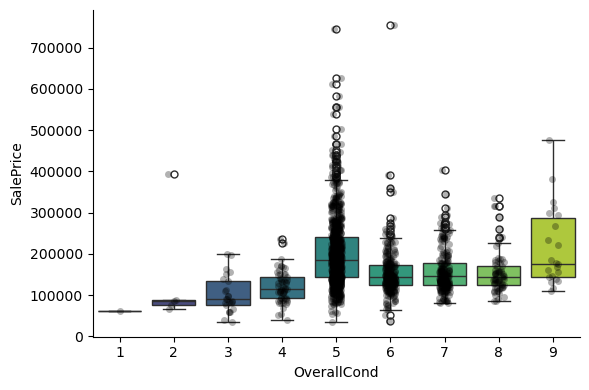

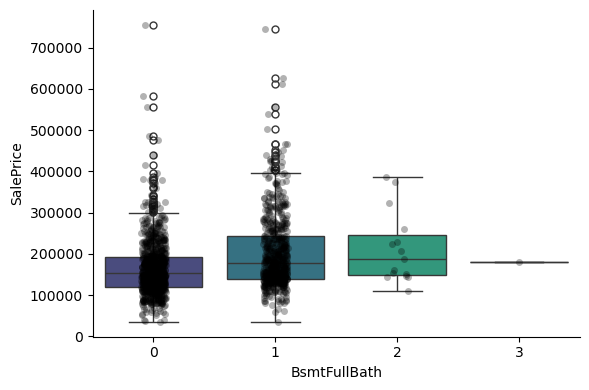

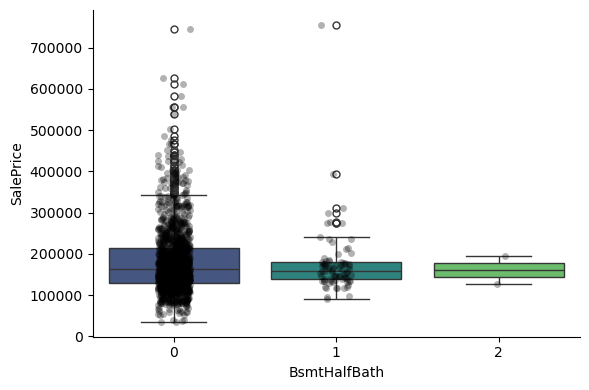

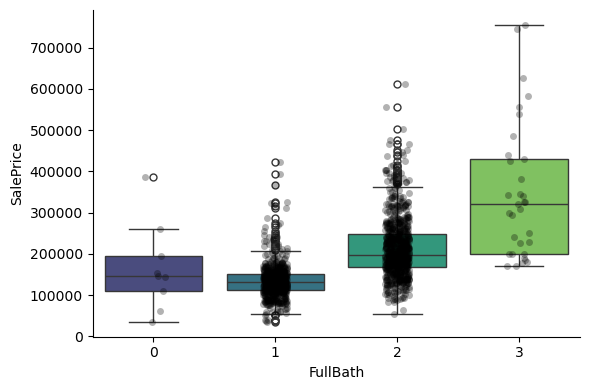

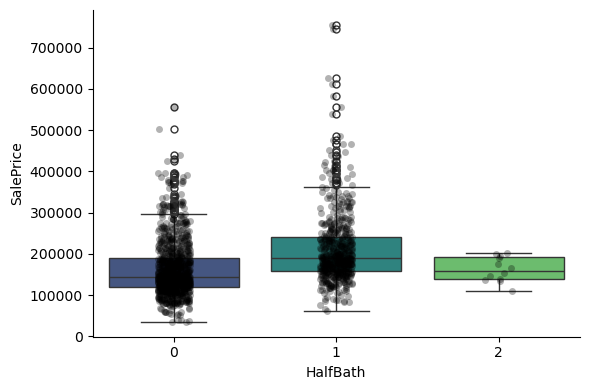

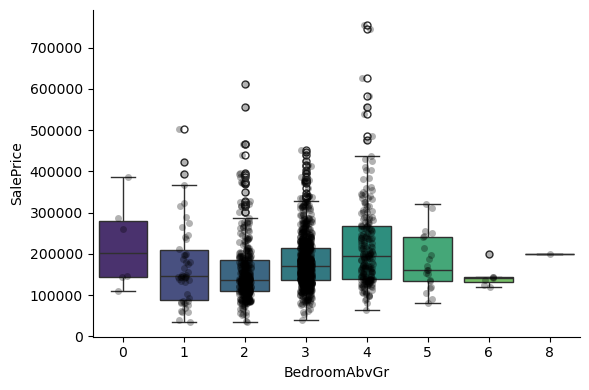

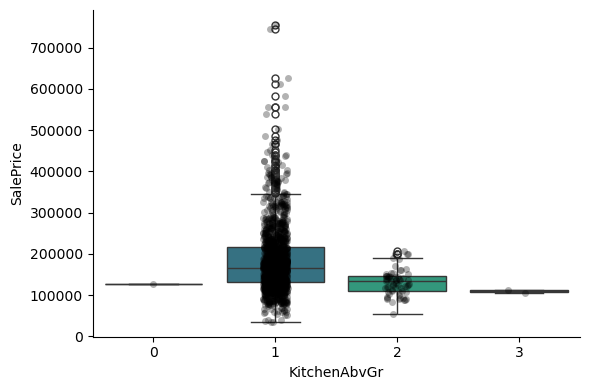

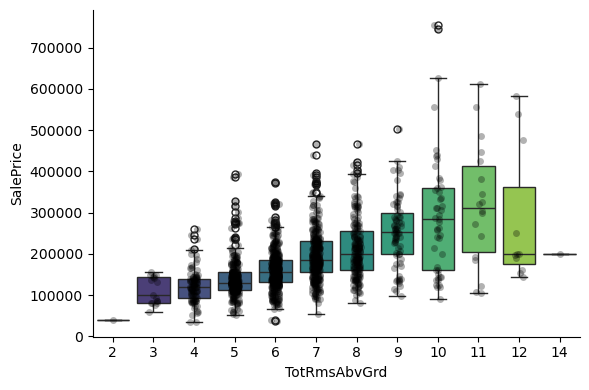

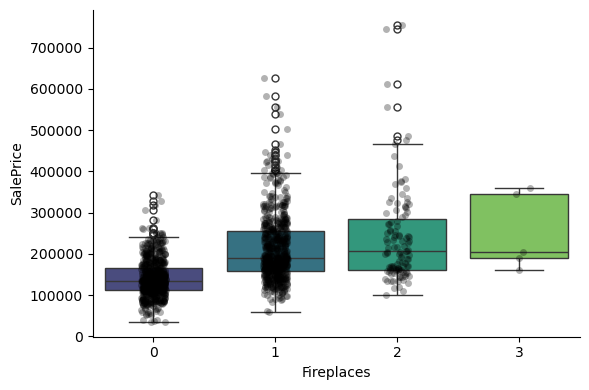

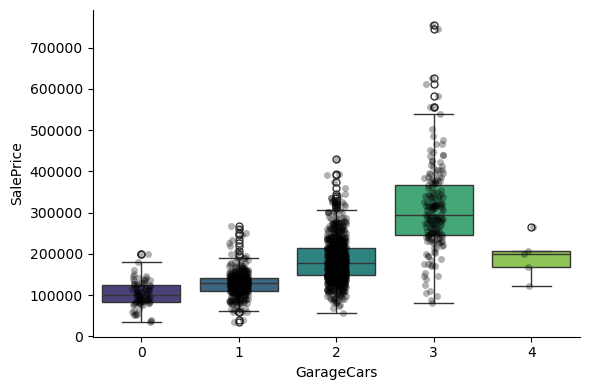

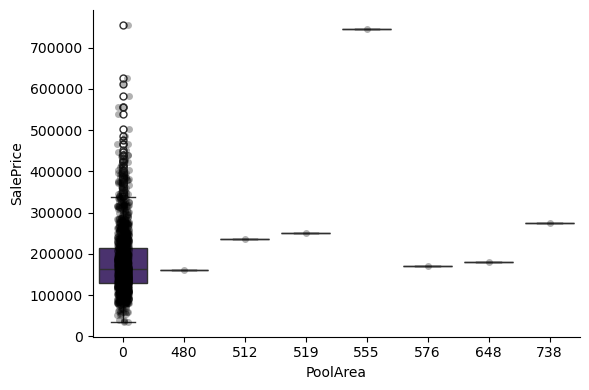

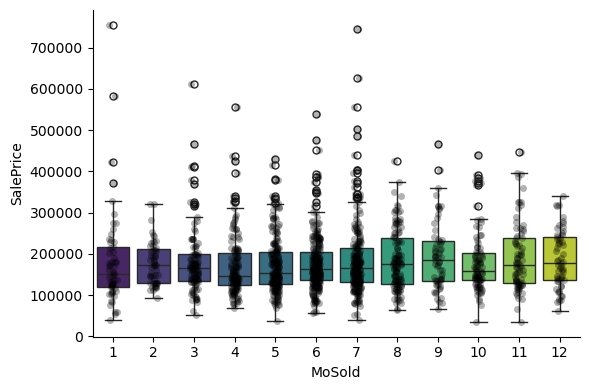

In [62]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y="SalePrice", data=data, kind='box', palette='viridis', height=4, aspect=1.5)
    
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y="SalePrice", data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most of discrete numerical variable, we see an increase in the sale price, with the quality, or overall condition, or number of rooms, or surface.

For some variable, we don't see this tendency. Most likely that variables is not good predictor for sale price.

SyntaxError: invalid syntax (3528599804.py, line 1)